### Time series financial data analysis made for APPL stock. 
#### AAPL vs TSLA stocks were also visualized together. 

In [1]:
# Download these libraries to view and manipulate the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Download these additional libraries to access the trading data
import os
import pandas_datareader.data as web
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day) # last 3 years data
# go to https://www.alphavantage.co/documentation/  to claim YOUR OWN API KEY and enter it to the cell below

In [2]:
AAPL = web.DataReader("AAPL", "av-daily", start=start, end=end, api_key='BSPYFBAKPK6KUVZW')
print(AAPL.tail())
print(AAPL.info())

              open    high       low   close     volume
2020-11-05  117.95  119.62  116.8686  119.03  126387074
2020-11-06  118.32  119.20  116.1300  118.69  114457922
2020-11-09  120.50  121.99  116.0500  116.32  154515315
2020-11-10  115.55  117.59  114.1300  115.97  138023390
2020-11-11  117.19  119.63  116.4400  119.49  112294954
<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2015-11-12 to 2020-11-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1259 non-null   float64
 1   high    1259 non-null   float64
 2   low     1259 non-null   float64
 3   close   1259 non-null   float64
 4   volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0+ KB
None


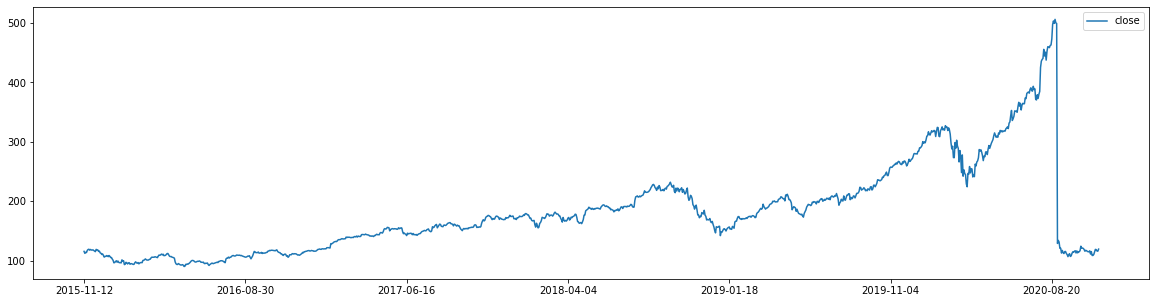

In [3]:
AAPL.plot(x= None, y='close',legend=True,figsize=(20,5)) # view the data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-11-12 to 2020-11-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   float64
 5   Adj Close  1260 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB
None


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-12,29.20,28.91,29.07,28.93,1.30e+08,26.59
2015-11-13,28.89,28.07,28.80,28.08,1.83e+08,25.81
2015-11-16,28.56,27.75,27.84,28.55,1.52e+08,26.23
2015-11-17,28.76,28.33,28.73,28.42,1.10e+08,26.12
2015-11-18,29.37,28.88,28.94,29.32,1.87e+08,26.95


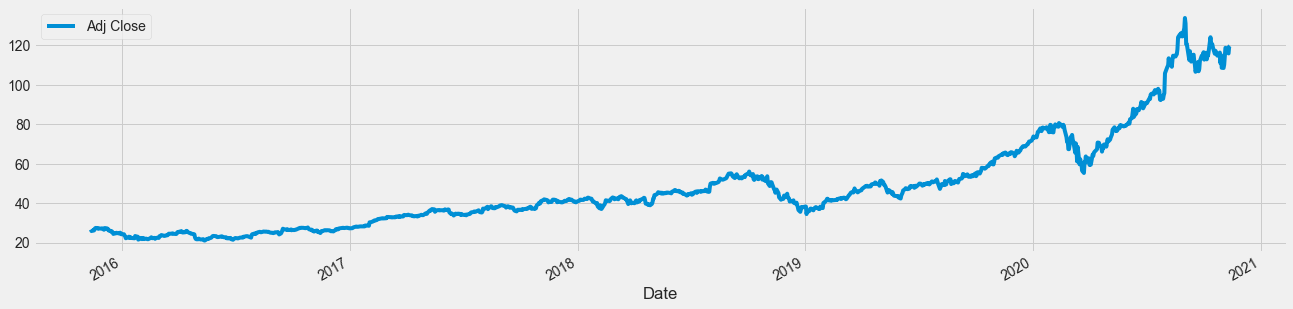

In [4]:
# Conclusion: The STOCK SPLIT was not adjusted in APPL stock above. This is a common problem. 

# Try the downloading adjusted prices. You can get adjusted prices from yahoo data source without an API key:
AAPL = web.get_data_yahoo('AAPL', start, end)
pd.set_option('precision', 2)
df_a = pd.DataFrame(AAPL)

# Set view options
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# View the data
print(df_a.info())
df_a.plot(x= None, y='Adj Close', legend=True, figsize=(20,5)) 
df_a.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-11-12 to 2020-11-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   float64
 5   Adj Close  1260 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB
None


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-12,43.80,42.53,43.57,42.59,1.46e+07,42.59
2015-11-13,42.60,41.30,42.59,41.44,1.72e+07,41.44
2015-11-16,43.00,41.16,41.22,42.86,1.46e+07,42.86
2015-11-17,43.20,42.28,43.04,42.80,1.07e+07,42.80
2015-11-18,44.28,42.50,42.90,44.21,1.41e+07,44.21


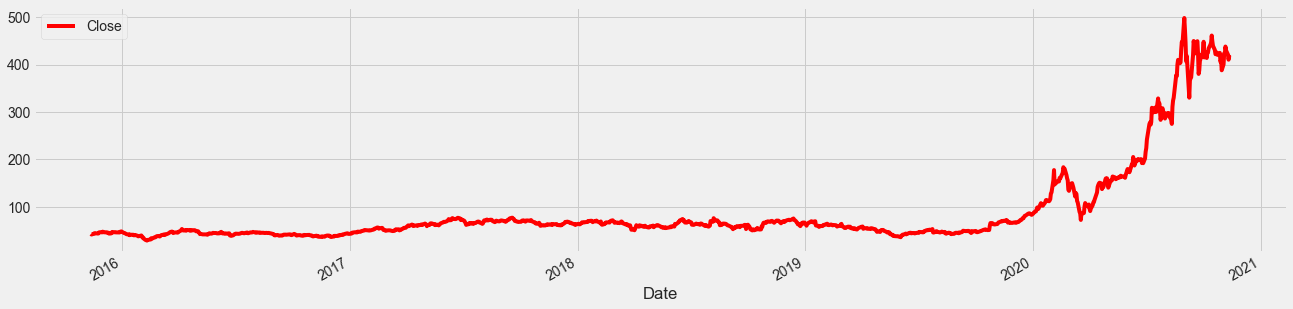

In [5]:
# Add TESLA's stock to visualize both AAPL and TSLA stocks together

# Download TSLA stock and view it
TSLA = web.get_data_yahoo('TSLA', start, end)
df_t = pd.DataFrame(TSLA)
df_t.plot(x= None, y= 'Close',legend=True, figsize=(20,5), color = 'red') # view the data
print(df_t.info())
df_t.head()

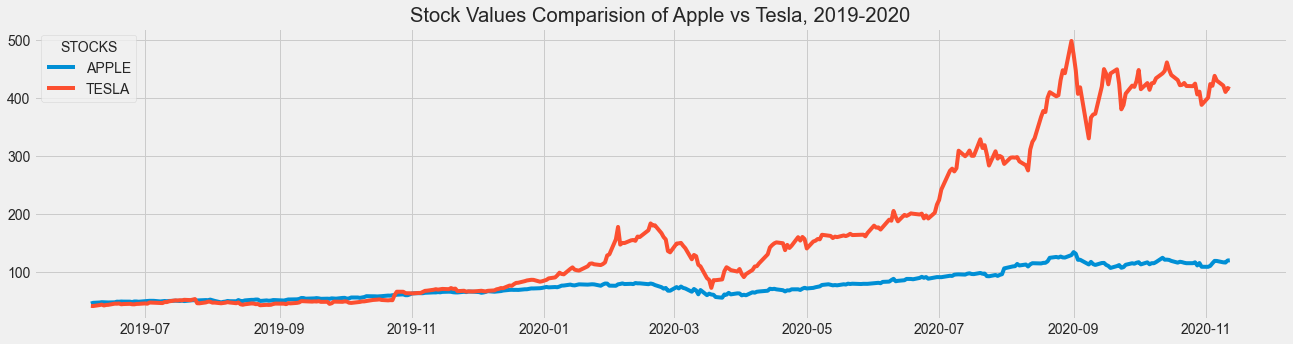

In [6]:
# Making multiple plots on the same time frame to visualize both AAPL and TSLA stocks together

# Compare these two stock closing values based on the last year's performance
x = df_t.index[-365:] 
y1 = df_a['Adj Close'][-365:]
y2 = df_t['Adj Close'][-365:]
plt.figure(figsize=(20,5))
plt.plot(x,y1,label="APPLE", )
plt.plot(x,y2,label="TESLA")
plt.title("Stock Values Comparision of Apple vs Tesla, 2019-2020")
plt.legend(title="STOCKS")
plt.show()

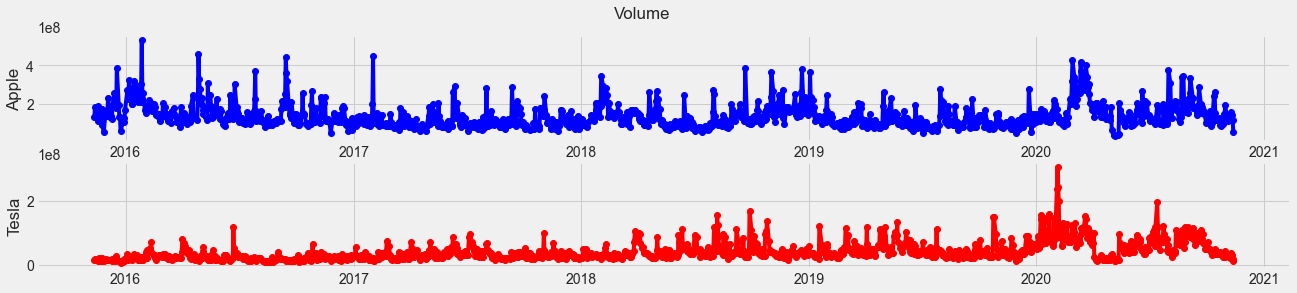

In [7]:
# Do the volume comparision in two separate charts since their trading volume overlaps very much. 

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Volume')
fig.set_figwidth(20)

ax1.plot(df_a.index, df_a['Volume'], 'o-', color = 'blue')
ax1.set_ylabel('Apple')

ax2.plot(df_t.index, df_t['Volume'], 'o-', color = 'red')
ax2.set_ylabel('Tesla')

plt.show()

             High    Low   Open  Close    Volume  Adj Close
Date                                                       
2015-11-12  29.20  28.91  29.07  28.93  1.30e+08      26.59
2015-11-13  28.89  28.07  28.80  28.08  1.83e+08      25.81
2015-11-16  28.56  27.75  27.84  28.55  1.52e+08      26.23
2015-11-17  28.76  28.33  28.73  28.42  1.10e+08      26.12
2015-11-18  29.37  28.88  28.94  29.32  1.87e+08      26.95


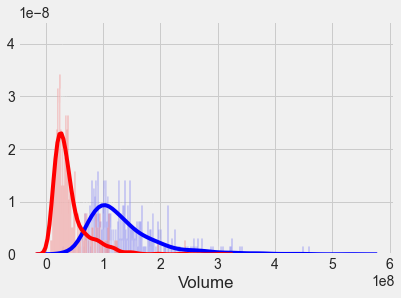

In [8]:
# View the histogram of the trading volume of the both stocks

sns.distplot(df_a['Volume'],bins=1000,color='blue')
sns.distplot(df_t['Volume'], bins = 1000, color = 'red')

# Comment: 
# See the difference of variance. APPLE's > TESLA's. 
# See the average volume traded TESLA's > APPLE's
print(df_a.head())

In [9]:
# Make a new dataframe to fit it to Facebook's Prophet Model made for time series modeling.

# Comment: fbprophet works with 'ds' and 'y' column names. 
# 'ds' format should be: YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp and 'y' format must be numeric

df_a['Date'] = df_a.index
AAPL_df = df_a[['Date','Adj Close']].copy()
AAPL_df.reset_index(drop=True, inplace=True)
AAPL_df['Adj Close'].astype('float64') 
AAPL_df = AAPL_df.rename(columns={'Date':'ds','Adj Close':'y'})
print(AAPL_df.info())
print(AAPL_df.head())
# print(AAPL_df.isna().sum()) # check if there are any missing values # Alternative: AAPL_df[AAPL_df['ds'].isnull()]) 
# AAPL_df.dropna(inplace=True) # drop missing values, if there is any.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1260 non-null   datetime64[ns]
 1   y       1260 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB
None
          ds      y
0 2015-11-12  26.59
1 2015-11-13  25.81
2 2015-11-16  26.23
3 2015-11-17  26.12
4 2015-11-18  26.95


In [10]:
# Install these packages on your terminal before continuing with the below cell:
# conda install -c conda-forge pystan
# conda install -c conda-forge fbprophet  
# conda install numpy  # do not forget to update your numpy, otherwise the jupyter kernel dies. 

In [11]:
# The below cells are intentionally marked with '#' since jupyter is experiencing some compatibility problems. 

# from fbprophet import Prophet  
# model = Prophet()
# model.fit(AAPL_df)
# future = model.make_future_dataframe(periods=365)
# forecast = model.predict(future)
# print(forecast)
# figure= model.plot(forecast, xlabel='Date',ylabel='Adjusted Closing Price')

In [12]:
# Do and ARIMA model for prediction of AAPL stock

# To be able to work with ARIMA, we need to manipulate the data until we get some stationary pattern. 
# A weekly, monthly, quarterly shift in data might bring some stationary pattern. 

# First: Check if the data is stationary or not.
# Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given time series is 
# stationary or not. If the p-value is obtained is greater than 0.05, the time series is in fact non-stationary.

AAPL_df = AAPL_df[-730:] # We will create a model just for the last 2 years this time
from statsmodels.tsa.stattools import adfuller
# ADF Test
result = adfuller(AAPL_df['y'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

# The data is non-stationary, we need to make it stationary by extracting patterns to feed it to a system. 

ADF Statistic: 0.6956846745524522
n_lags: 0.9897513552978725
p-value: 0.9897513552978725
Critial Values:
   1%, -3.439464954327953
Critial Values:
   5%, -2.8655625802683473
Critial Values:
   10%, -2.5689120852623457


/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


ADF Statistic: -4.731260235640272
n_lags: 7.348105619236966e-05
p-value: 7.348105619236966e-05
Critial Values:
   1%, -3.439464954327953
Critial Values:
   5%, -2.8655625802683473
Critial Values:
   10%, -2.5689120852623457


560   -4.26
561   -2.86
562   -3.69
563   -3.68
564   -3.23
Name: y, dtype: float64

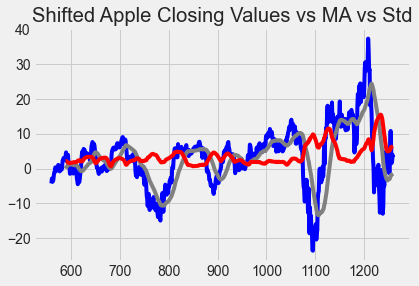

In [13]:
# Move the data's p value to below 0.05 so that stationary values can be obtained.
# Most people try quarterly, weekly shifts as well. In fact, there is no good shift value for ANY STOCK PRICE!

# To find a way out for a good parameter for ARIMA MODEL p needs to be below 0.05. 
# Shift the original data to get some monthly pattern.

# Out of Differencing, Seasonal Differencing, and Transformation options, chose first option: The data is NOT
# exponential so log transformation would punish it too much. The data is also certainly not seasonal. 

# Smooth the data with the mean of 30 instances with a sliding window (going for monthly periods)

AAPL_new = AAPL_df['y'].copy()
shifted_AAPL_new = AAPL_new.shift(30)
AAPL_new = AAPL_new - shifted_AAPL_new
AAPL_new.dropna(inplace=True) # get rid of the none values

ma_new = AAPL_new.rolling(window=30).mean() # new data moving averege mean
ma_new.dropna(inplace=True)
std_new = AAPL_new.rolling(window=30).std() # new data std 
std_new.dropna(inplace=True)

# view the chart 
plt.title("Shifted Apple Closing Values vs MA vs Std")
plt.plot(AAPL_new, color = 'blue', )
plt.plot(ma_new, color = 'grey')
plt.plot(std_new, color = 'red')

# After shifting the data 30 days, we have a pattern that would work better for ARIMA model. 
# AAPL_new.plot(x = None, y = 'y', figsize=(20,5), color = 'blue' )

# ADF Test Again
result_log = adfuller(AAPL_new, autolag='AIC')
print(f'ADF Statistic: {result_log[0]}')
print(f'n_lags: {result_log[1]}')
print(f'p-value: {result_log[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

# p value is below 0.05 so we can feed this new shifted data to the ARIMA model.
AAPL_new.head()

In [14]:
# Import ARIMA: Auto Regressive Integrated Moving Average Model (AR(Auto Regressive) + MA(Moving Average))
# ACF(Auto Correlation Function) & PACF(Partial Auto Correlation Function) graphs are used to find Q & P values.
# P value is showing auto regressive lags and Q value is showing moving average.  
# Note: From PACF(at y=0), get P value. From ACF(at y=0), get Q value. D is the order of differentiation. 

from statsmodels.tsa.arima_model import ARIMA
# Try grid search for best P, D, Q parameters since the stock time series is too hard for getting the right params.
p_values = range(1, 12)
d_values = range(0, 3)
q_values = range(0, 3)

# Split the data into train and test set
# intentionally allocating a large portion to the training data since AAPL was too volitile last 3 months. 
index = int(len(AAPL_new) * 0.90) 
train_data = AAPL_new[:index]
test_data = AAPL_df['y'][index:]

# Write a simple function to calculate the mean square error between the testing set and trained model forecast

from sklearn.metrics import mean_squared_error

def run_ARIMA(train, test, p, d, q):
    order = (p,d,q)
    model = ARIMA(train, order) # this is how the model is fit 
    model_fit = model.fit(disp=0)
    fc, se, conf = model_fit.forecast(len(test))
    fc = np.array(fc)
    test = np.array(test)
    total_error = mean_squared_error(test, fc)
    return total_error
 
    
# Do a grid search on the best parameters to find the minimum error between the training and testing datasets
min_error = np.inf 
best_params = None
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                error = run_ARIMA(train_data, test_data, p, d, q)
                if error < min_error:
                    min_error = error
                    best_p = p
                    best_d = d
                    best_q = q
            except:
                continue

print('Best ARIMA parameters are: ' , best_p, best_d, best_q)


/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/

/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/

/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/

/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/

/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/

Best ARIMA parameters are:  10 2 0


In [15]:
# View the model with the best parameters and fit them into the model.

# REMINDER: STOCK DATA HAS NO SEASONALITY, IT DOES NOT DEPENDS ON ANY SEASONAL, MONTHLY, OR ANNUAL CHANGES.
# Keep it simple and stupid to do a forecasting with high 95% confidence 

# Build Model
model = ARIMA(AAPL_new, order = (best_p, best_d, best_q))  
fitted = model.fit(disp = -1)  

# Forecast based on the tweaked (shifted) data
fc, se, conf = fitted.forecast(30, alpha=0.05)  # with 95% confidence level

print(len(fc)) # monthly prediction is set for 30 days

/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


30


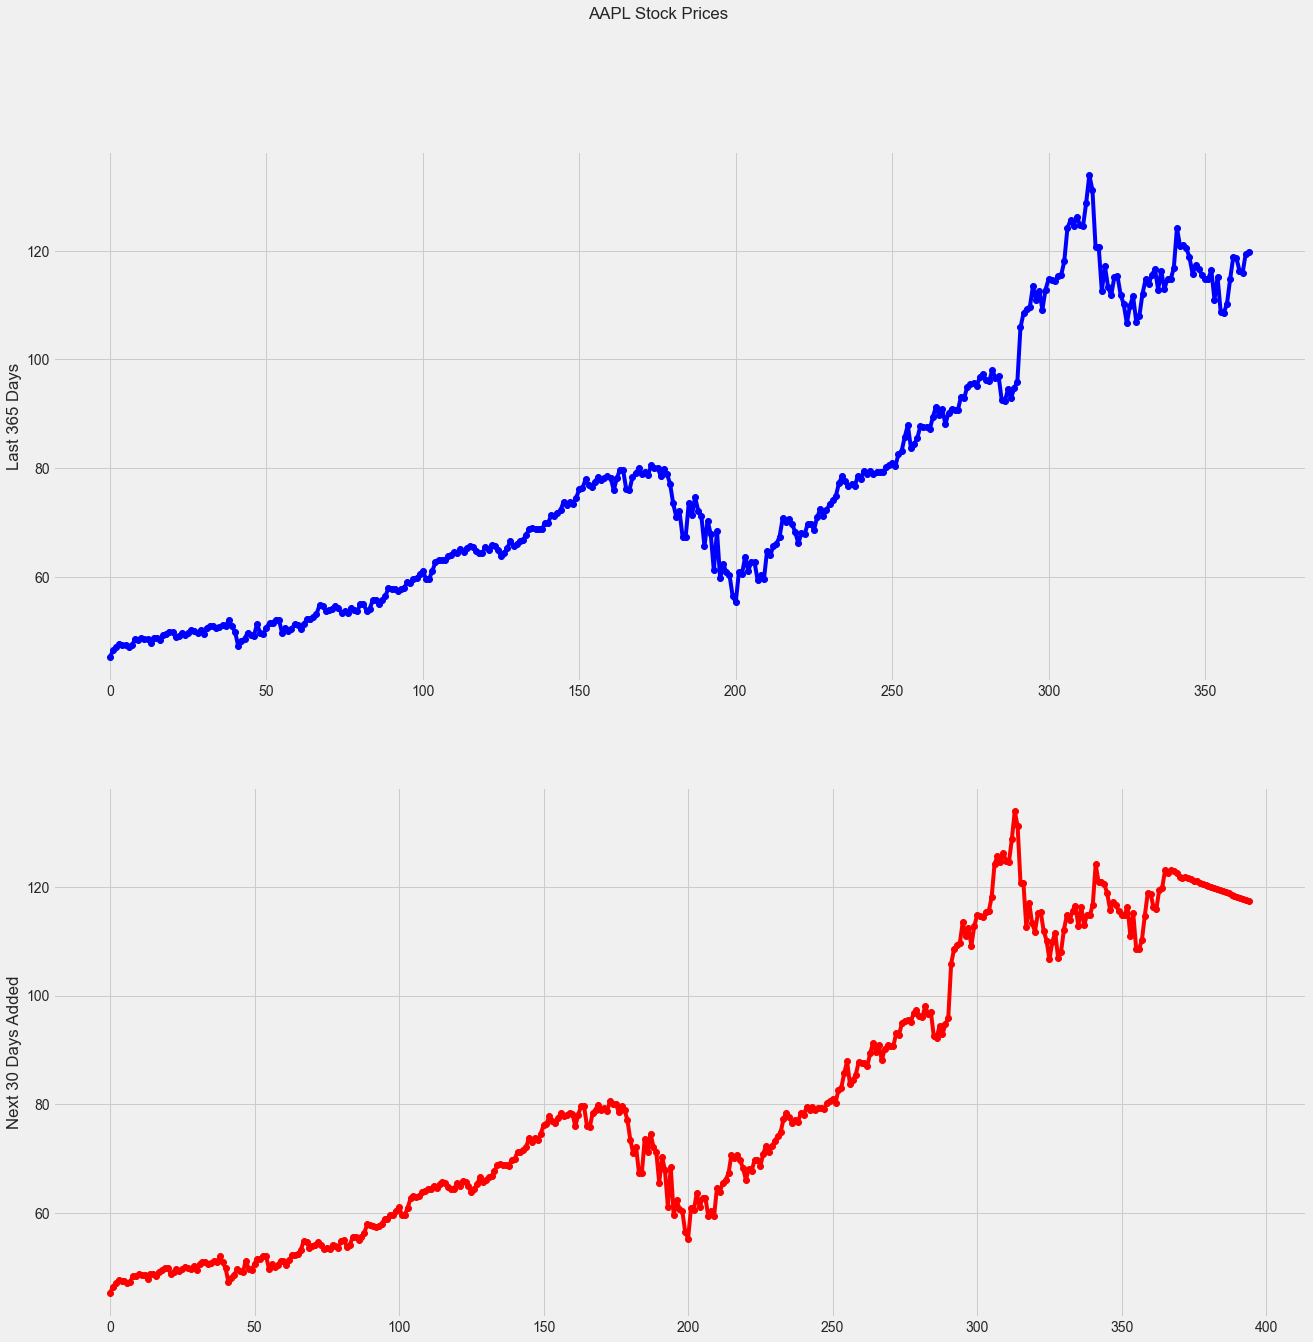

In [16]:
# Convert the forecast to pandas series and view the last year's actual data and next year's projection

fc_series = np.array(fc) 
data_last_year = np.array(df_a['Adj Close'][-365:])
fc_series += data_last_year[-1] # start from the last day
data_with_fc = []
for i in range(len(data_last_year)):
    data_with_fc.append(data_last_year[i])
for i in range(len(fc_series)):
    data_with_fc.append(fc_series[i])

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('AAPL Stock Prices')
fig.set_figwidth(20)
fig.set_figheight(20)

ax1.plot(data_last_year, 'o-', color = 'blue')
ax1.set_ylabel('Last 365 Days')

ax2.plot(data_with_fc, 'o-', color = 'red')
ax2.set_ylabel('Next 30 Days Added')
plt.show()

In [17]:
# Conclusion: The last few months' fast volatility effected the model too much. it is probably not a good model since:
# IN REALITY, STOCK DATA HAS NO WEEKLY, MONTHLY, or QUARTERLY SEASONAL CHANGES. We assumed a monthly pattern. 

In [18]:
# Do a Keras LSTM Model Analysis on the AAPL Stock Data

In [19]:
# Get the data for the last 8 years this time
from pandas_datareader.data import DataReader
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show teh data
df.info()
df[:5]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2232 entries, 2012-01-03 to 2020-11-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2232 non-null   float64
 1   Low        2232 non-null   float64
 2   Open       2232 non-null   float64
 3   Close      2232 non-null   float64
 4   Volume     2232 non-null   float64
 5   Adj Close  2232 non-null   float64
dtypes: float64(6)
memory usage: 122.1 KB


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.73,14.61,14.62,14.69,3.02e+08,12.57
2012-01-04,14.81,14.62,14.64,14.77,2.60e+08,12.63
2012-01-05,14.95,14.74,14.82,14.93,2.71e+08,12.77
2012-01-06,15.10,14.97,14.99,15.09,3.18e+08,12.91
2012-01-09,15.28,15.05,15.20,15.06,3.94e+08,12.89


In [20]:
dataset = df['Adj Close'].values
# Convert the dataframe to a numpy array
dataset = np.array(dataset)
dataset = dataset[:,np.newaxis]
# Get the number of rows to train the model on
split_index = int(len(dataset) * 0.8)
print(split_index)
print(dataset.shape)
dataset[:10]

1785
(2232, 1)


array([[12.56667614],
       [12.63421345],
       [12.77448082],
       [12.90802288],
       [12.8875494 ],
       [12.93369102],
       [12.91260338],
       [12.87715721],
       [12.82887363],
       [12.97830772]])

In [21]:
# Scale the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data[:5], scaled_data[-5:])

[[0.00374607]
 [0.00430039]
 [0.00545164]
 [0.0065477 ]
 [0.00637966]] [[0.87476144]
 [0.85530946]
 [0.85243682]
 [0.88132746]
 [0.88506192]]


In [22]:
# Create your own target, based on the time series. The targets are chosen for the average of the next 30 days values.
# LSTM requires a dataset with 3 dimensions. Each instance is expanded to next 30 instances from its index. 

def create_LSTM_dataset(dataset):
    x_dataset = []
    y_dataset = []
    # start from the 30th day since we are more interested in the later data 
    for i in range(30, len(dataset)):
        x_dataset.append(dataset[i-30:i])
        y_dataset.append(dataset[i])
    # for the first 30 days, only insert the average of the first 30 days as they are. 
    # LSTM will forget them eventually so no need for taking the 
    # average or weighted averages of smaller time periods
    first_30_days = dataset[:30]
    return np.array(x_dataset), np.array(y_dataset)

x, y = create_LSTM_dataset(scaled_data)
# print(x[0], y[0])
print(x.shape, y.shape)

(2202, 30, 1) (2202, 1)


In [23]:
# Do the split for training and testing sets

split_index = int(len(scaled_data) * 0.80)
trainX, testX = x[:split_index], x[split_index:]
trainY, testY = y[:split_index] , y[split_index:]
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
# print(testX[0], testY[0])

(1785, 30, 1) (1785, 1) (417, 30, 1) (417, 1)


In [24]:
# Create the model with Keras

from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (trainX.shape[1], trainX.shape[2])))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Using TensorFlow backend.
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/volkansonmez/miniconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/volkansonmez/miniconda/lib/p

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x = trainX, y = trainY, validation_data = (testX, testY), epochs = 1, batch_size = 30, verbose = True) 


Train on 1785 samples, validate on 417 samples
Epoch 1/1
1785/1785 [==============================] - 3s 2ms/step - loss: 0.0011 - val_loss: 0.0014


In [26]:
# Comment: Since the loss is quite small, there is no need to increase epoch size, accept the results as they are. 
test_predictions = model.predict(testX)
print(test_predictions[:5])
predictions = scaler.inverse_transform(test_predictions)
print(predictions[:5])

[[0.26247227]
 [0.26505148]
 [0.2672647 ]
 [0.2689869 ]
 [0.27044204]]
[[44.089527]
 [44.403774]
 [44.673428]
 [44.88326 ]
 [45.06055 ]]


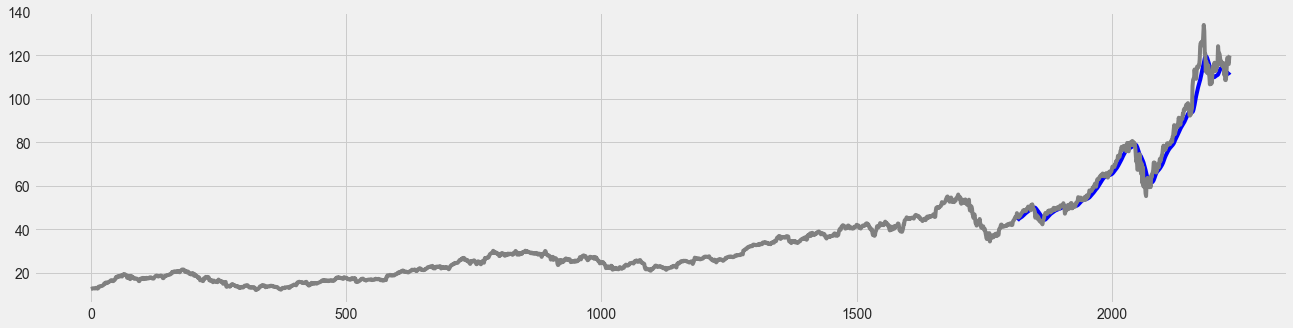

In [27]:
# Shift the first 30 days ahead
concat = []
for i in range(len(trainX) + 30):
    concat.append(None)
for i in range(len(predictions)):
    concat.append(predictions[i])

plt.figure(figsize = (20,5))
plt.plot(concat, color = 'blue')
plt.plot(dataset, color = 'gray')

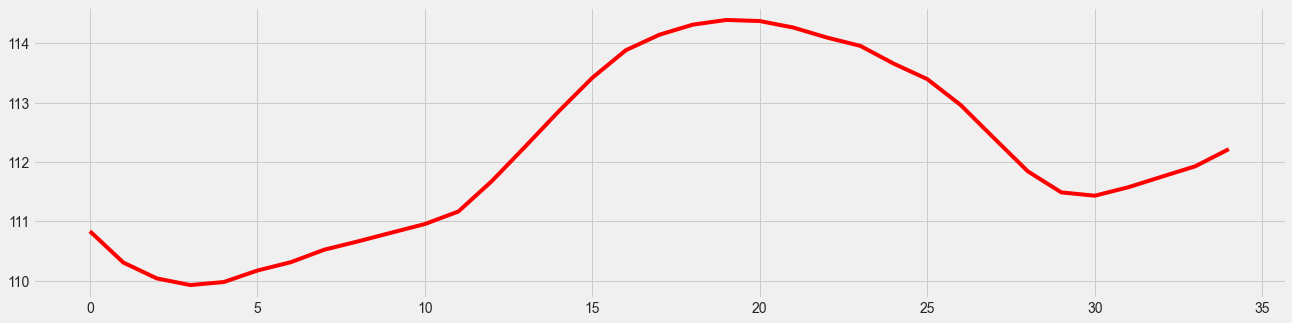

In [28]:
# Conclusion: it is an overfit, this is not going to be very realistic. 
# Anyways, let's make a prediction for the next 35 days

last_35_days = testX[-35:]
predictions = model.predict(last_35_days)
predictions = scaler.inverse_transform(predictions)
# print(predictions)
plt.figure(figsize = (20,5))
plt.plot(predictions, color = 'red')


#### Conclusion: Based on both ARIMA and LSTM models, it looks like AAPL is not moving much up or down (as of: 11/12/2020)

Example: On November 12, 2020, if you decide to do an option trade made for about 35 days ahead: 
Pick an "iron condor" with +- 5 dollars that would give 95% confidence level according to the sh.tty model we made. 

#### Bonus: Create the same sequential model with pytorch if you like instead of Keras. It will be the same outcome. 
    import torch
    import torch.nn as nn

    # Reminder: np.array does not work with pytorch, data structure has to be a tensor before they are fed into the model.
    trainY = torch.Tensor(trainY) 
    trainX = torch.Tensor(trainX)
    print(trainY.shape, trainX.shape)

    class LSTM(nn.Module):
        def __init__(self, input_size=30, hidden_layer_size=50, output_size=1):
            super().__init__()
            self.hidden_layer_size = hidden_layer_size

            self.lstm = nn.LSTM(input_size, hidden_layer_size)

            self.linear = nn.Linear(hidden_layer_size, output_size)

            self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                                torch.zeros(1,1,self.hidden_layer_size))

        def forward(self, input_seq):
            lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
            predictions = self.linear(lstm_out.view(len(input_seq), -1))
            return predictions[-1]

    model = LSTM()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    print(model)

### This is the end of the Data Analysis with FBProphet, ARIMA, and KERAS models made for AAPL Stock Data. 